In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pickle

In [34]:
from sklearn.metrics import classification_report, confusion_matrix, explained_variance_score
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split, GridSearchCV

In [4]:
df = pd.read_csv("african_econ_crises.csv")

In [5]:
df

,case,cc3,country,year,systemic_crisis,exch_usd,domestic_debt_in_default,sovereign_external_debt_default,gdp_weighted_default,inflation_annual_cpi,independence,currency_crises,inflation_crises,banking_crisis
0,1,DZA,Algeria,1870,1,0.052264,0,0,0.0,3.441456,0,0,0,crisis
1,1,DZA,Algeria,1871,0,0.052798,0,0,0.0,14.149140,0,0,0,no_crisis
2,1,DZA,Algeria,1872,0,0.052274,0,0,0.0,-3.718593,0,0,0,no_crisis
3,1,DZA,Algeria,1873,0,0.051680,0,0,0.0,11.203897,0,0,0,no_crisis
4,1,DZA,Algeria,1874,0,0.051308,0,0,0.0,-3.848561,0,0,0,no_crisis
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1054,70,ZWE,Zimbabwe,2009,1,354.800000,1,1,0.0,-7.670000,1,1,0,crisis
1055,70,ZWE,Zimbabwe,2010,0,378.200000,1,1,0.0,3.217000,1,0,0,no_crisis
1056,70,ZWE,Zimbabwe,2011,0,361.900000,1,1,0.0,4.920000,1,0,0,no_crisis
1057,70,ZWE,Zimbabwe,2012,0,361.900000,1,1,0.0,3.720000,1,0,0,no_crisis


In [6]:
df.drop(["case", "cc3", "country", "year"], axis=1, inplace=True)

In [7]:
df["banking_crisis"] = pd.get_dummies(df["banking_crisis"], drop_first=True)

In [8]:
df

,systemic_crisis,exch_usd,domestic_debt_in_default,sovereign_external_debt_default,gdp_weighted_default,inflation_annual_cpi,independence,currency_crises,inflation_crises,banking_crisis
0,1,0.052264,0,0,0.0,3.441456,0,0,0,0
1,0,0.052798,0,0,0.0,14.149140,0,0,0,1
2,0,0.052274,0,0,0.0,-3.718593,0,0,0,1
3,0,0.051680,0,0,0.0,11.203897,0,0,0,1
4,0,0.051308,0,0,0.0,-3.848561,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...
1054,1,354.800000,1,1,0.0,-7.670000,1,1,0,0
1055,0,378.200000,1,1,0.0,3.217000,1,0,0,1
1056,0,361.900000,1,1,0.0,4.920000,1,0,0,1
1057,0,361.900000,1,1,0.0,3.720000,1,0,0,1


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1059 entries, 0 to 1058
Data columns (total 10 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   systemic_crisis                  1059 non-null   int64  
 1   exch_usd                         1059 non-null   float64
 2   domestic_debt_in_default         1059 non-null   int64  
 3   sovereign_external_debt_default  1059 non-null   int64  
 4   gdp_weighted_default             1059 non-null   float64
 5   inflation_annual_cpi             1059 non-null   float64
 6   independence                     1059 non-null   int64  
 7   currency_crises                  1059 non-null   int64  
 8   inflation_crises                 1059 non-null   int64  
 9   banking_crisis                   1059 non-null   uint8  
dtypes: float64(3), int64(6), uint8(1)
memory usage: 75.6 KB


In [10]:
df.describe()

,systemic_crisis,exch_usd,domestic_debt_in_default,sovereign_external_debt_default,gdp_weighted_default,inflation_annual_cpi,independence,currency_crises,inflation_crises,banking_crisis
count,1059.000000,1059.000000,1059.000000,1059.000000,1059.000000,1.059000e+03,1059.000000,1059.000000,1059.000000,1059.000000
mean,0.077432,43.140831,0.039660,0.152975,0.006402,2.084889e+04,0.776204,0.132200,0.129367,0.911237
std,0.267401,111.475380,0.195251,0.360133,0.043572,6.757274e+05,0.416984,0.349847,0.335765,0.284536
min,0.000000,0.000000,0.000000,0.000000,0.000000,-2.850214e+01,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.195350,0.000000,0.000000,0.000000,2.086162e+00,1.000000,0.000000,0.000000,1.000000
50%,0.000000,0.868400,0.000000,0.000000,0.000000,5.762330e+00,1.000000,0.000000,0.000000,1.000000
75%,0.000000,8.462750,0.000000,0.000000,0.000000,1.164405e+01,1.000000,0.000000,0.000000,1.000000
max,1.000000,744.306139,1.000000,1.000000,0.400000,2.198970e+07,1.000000,2.000000,1.000000,1.000000


In [11]:
df.corr()

,systemic_crisis,exch_usd,domestic_debt_in_default,sovereign_external_debt_default,gdp_weighted_default,inflation_annual_cpi,independence,currency_crises,inflation_crises,banking_crisis
systemic_crisis,1.000000,0.202687,0.122158,0.249850,0.005274,0.106452,0.147083,0.112751,0.172562,-0.853702
exch_usd,0.202687,1.000000,0.005253,0.422890,-0.040726,-0.011947,0.126034,-0.056472,-0.063783,-0.168775
domestic_debt_in_default,0.122158,0.005253,1.000000,0.464751,-0.029874,0.151832,0.109120,0.227585,0.224429,-0.225797
sovereign_external_debt_default,0.249850,0.422890,0.464751,1.000000,0.345919,0.072609,0.228192,0.199428,0.187930,-0.263992
gdp_weighted_default,0.005274,-0.040726,-0.029874,0.345919,1.000000,-0.004535,0.078936,0.016970,0.017630,-0.026545
inflation_annual_cpi,0.106452,-0.011947,0.151832,0.072609,-0.004535,1.000000,0.016569,0.076590,0.080060,-0.098860
independence,0.147083,0.126034,0.109120,0.228192,0.078936,0.016569,1.000000,0.086376,-0.022548,-0.159620
currency_crises,0.112751,-0.056472,0.227585,0.199428,0.016970,0.076590,0.086376,1.000000,0.393376,-0.166859
inflation_crises,0.172562,-0.063783,0.224429,0.187930,0.017630,0.080060,-0.022548,0.393376,1.000000,-0.235852
banking_crisis,-0.853702,-0.168775,-0.225797,-0.263992,-0.026545,-0.098860,-0.159620,-0.166859,-0.235852,1.000000


<AxesSubplot:>

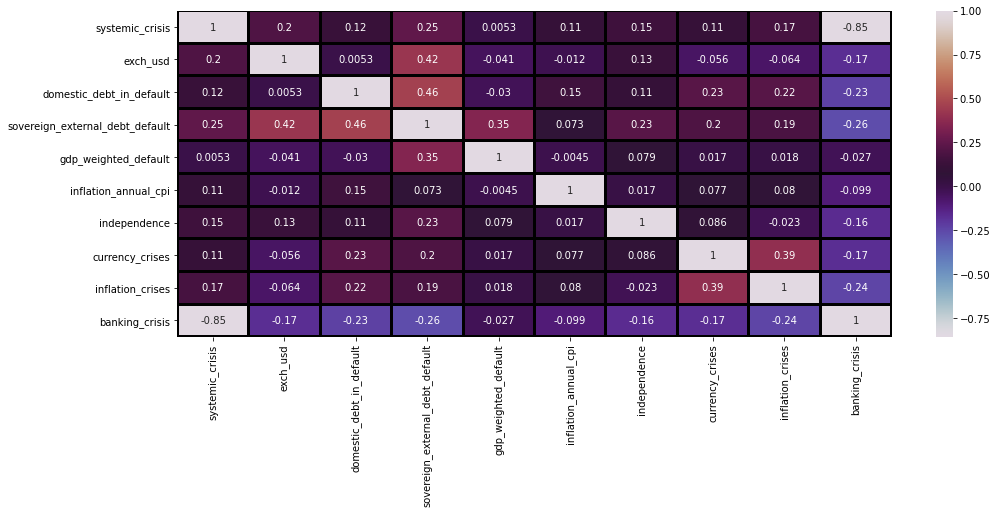

In [12]:
plt.figure(figsize=(16,6))
sns.heatmap(df.corr(), annot=True, linecolor="black", linewidths=2, cmap="twilight")

In [14]:
df

,systemic_crisis,exch_usd,domestic_debt_in_default,sovereign_external_debt_default,gdp_weighted_default,inflation_annual_cpi,independence,currency_crises,inflation_crises,banking_crisis
0,1,0.052264,0,0,0.0,3.441456,0,0,0,0
1,0,0.052798,0,0,0.0,14.149140,0,0,0,1
2,0,0.052274,0,0,0.0,-3.718593,0,0,0,1
3,0,0.051680,0,0,0.0,11.203897,0,0,0,1
4,0,0.051308,0,0,0.0,-3.848561,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...
1054,1,354.800000,1,1,0.0,-7.670000,1,1,0,0
1055,0,378.200000,1,1,0.0,3.217000,1,0,0,1
1056,0,361.900000,1,1,0.0,4.920000,1,0,0,1
1057,0,361.900000,1,1,0.0,3.720000,1,0,0,1


In [15]:
df["target"] = df["systemic_crisis"]

In [16]:
df.drop("systemic_crisis", axis=1, inplace=True)

In [17]:
df

,exch_usd,domestic_debt_in_default,sovereign_external_debt_default,gdp_weighted_default,inflation_annual_cpi,independence,currency_crises,inflation_crises,banking_crisis,target
0,0.052264,0,0,0.0,3.441456,0,0,0,0,1
1,0.052798,0,0,0.0,14.149140,0,0,0,1,0
2,0.052274,0,0,0.0,-3.718593,0,0,0,1,0
3,0.051680,0,0,0.0,11.203897,0,0,0,1,0
4,0.051308,0,0,0.0,-3.848561,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...
1054,354.800000,1,1,0.0,-7.670000,1,1,0,0,1
1055,378.200000,1,1,0.0,3.217000,1,0,0,1,0
1056,361.900000,1,1,0.0,4.920000,1,0,0,1,0
1057,361.900000,1,1,0.0,3.720000,1,0,0,1,0


<AxesSubplot:xlabel='target', ylabel='count'>

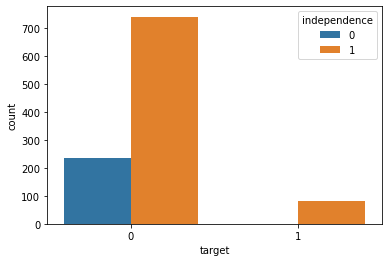

In [21]:
sns.countplot(x = df["target"], hue= "independence", data=df)

In [25]:
X = df.drop("target", axis=1)
y = df["target"]

In [27]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

In [28]:
log_model = LogisticRegression(n_jobs=200)

In [29]:
log_model.fit(X_train,y_train)

LogisticRegression(n_jobs=200)

In [30]:
log_predictions = log_model.predict(X_test)

In [32]:
print(classification_report(log_predictions, y_test))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99       293
           1       0.92      0.88      0.90        25

    accuracy                           0.98       318
   macro avg       0.95      0.94      0.94       318
weighted avg       0.98      0.98      0.98       318



In [33]:
print(confusion_matrix(log_predictions, y_test))

[[291   2]
 [  3  22]]


In [35]:
kNear_Model = KNeighborsClassifier(n_neighbors=3, n_jobs=300)

In [36]:
kNear_Model.fit(X_train, y_train)

KNeighborsClassifier(n_jobs=300, n_neighbors=3)

In [37]:
kn_pred = kNear_Model.predict(X_test)

In [38]:
print(classification_report(kn_pred, y_test))

              precision    recall  f1-score   support

           0       0.97      0.94      0.95       303
           1       0.25      0.40      0.31        15

    accuracy                           0.92       318
   macro avg       0.61      0.67      0.63       318
weighted avg       0.94      0.92      0.92       318



In [39]:
error_rate = []

for i in range(1,10):
    kn = KNeighborsClassifier(n_neighbors=i, n_jobs=300)
    kn.fit(X_train,y_train)
    pred = kn.predict(X_test)
    error_rate.append(np.mean(pred != y_test))

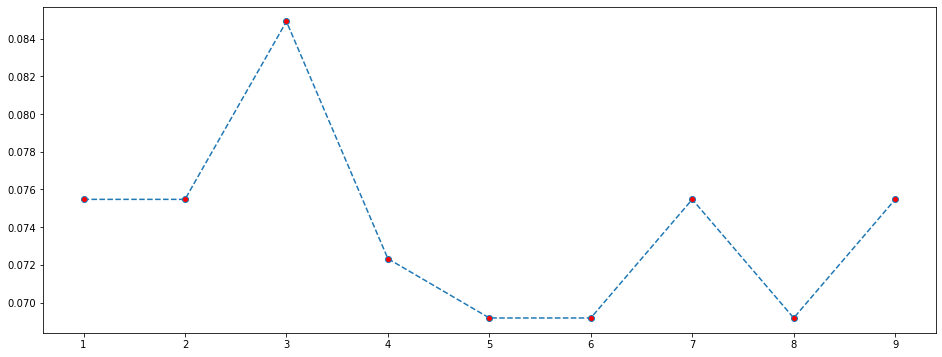

In [40]:
plt.figure(figsize=(16,6))
plt.plot(range(1,10), error_rate, marker = "o", mfc = "r", ls = "--")

In [67]:
kNear_Model = KNeighborsClassifier(n_neighbors=5, n_jobs=700)
kNear_Model.fit(X_train, y_train)
kn_pred = kNear_Model.predict(X_test)

In [68]:
print(classification_report(kn_pred, y_test))

              precision    recall  f1-score   support

           0       0.99      0.94      0.96       308
           1       0.25      0.60      0.35        10

    accuracy                           0.93       318
   macro avg       0.62      0.77      0.66       318
weighted avg       0.96      0.93      0.94       318



## Scaling Data

In [47]:
scalar = StandardScaler()

In [49]:
scalar.fit(df.drop("target", axis=1))

StandardScaler()

In [50]:
scaledData = scalar.transform(df.drop("target", axis=1))

In [53]:
scaled_df = pd.DataFrame(scaledData, columns=X_train.columns)

In [55]:
X = scaled_df
y = df["target"]

In [56]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [57]:
svm_Model = SVC()

In [58]:
svm_Model.fit(X_train, y_train)

SVC()

In [59]:
svm_pred = svm_Model.predict(X_test)

In [60]:
print(classification_report(svm_pred, y_test))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99       323
           1       0.86      0.89      0.87        27

    accuracy                           0.98       350
   macro avg       0.92      0.94      0.93       350
weighted avg       0.98      0.98      0.98       350



## Reverting to non scaled data for now

In [61]:
X = df.drop("target", axis=1)
y = df["target"]

In [62]:
 X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

In [63]:
rf_model = RandomForestClassifier(n_estimators=200)

In [64]:
rf_model.fit(X_train, y_train)

RandomForestClassifier(n_estimators=200)

In [65]:
rf_predictions = rf_model.predict(X_test)

In [66]:
print(classification_report(rf_predictions, y_test))

              precision    recall  f1-score   support

           0       0.99      0.98      0.99       298
           1       0.75      0.90      0.82        20

    accuracy                           0.97       318
   macro avg       0.87      0.94      0.90       318
weighted avg       0.98      0.97      0.98       318



## k means clustering

In [76]:
scalar = StandardScaler()
scalar.fit(df.drop("target", axis=1))
scaledData = scalar.transform(df.drop("target", axis=1))
scaled_df = pd.DataFrame(scaledData, columns=X_train.columns)

In [77]:
X = scaled_df
y = df["target"]

In [78]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [87]:
from sklearn.cluster import KMeans

In [92]:
km_cluster = KMeans(n_clusters=2)

In [93]:
km_cluster.fit(df.drop("target", axis=1))

KMeans(n_clusters=2)

In [94]:
km_cluster.labels_

array([0, 0, 0, ..., 0, 0, 0], dtype=int32)

In [95]:
print(classification_report(km_cluster.labels_, df["target"]))

              precision    recall  f1-score   support

           0       1.00      0.92      0.96      1058
           1       0.01      1.00      0.02         1

    accuracy                           0.92      1059
   macro avg       0.51      0.96      0.49      1059
weighted avg       1.00      0.92      0.96      1059



 ## Lets try to improve with different K values

In [84]:
errorRate = []
for i in range(1,5):
    kmc = KMeans(n_clusters=i)
    kmc.fit(df.drop("target", axis=1))
    errorRate.append(np.mean(kmc.labels_ != df["target"]))

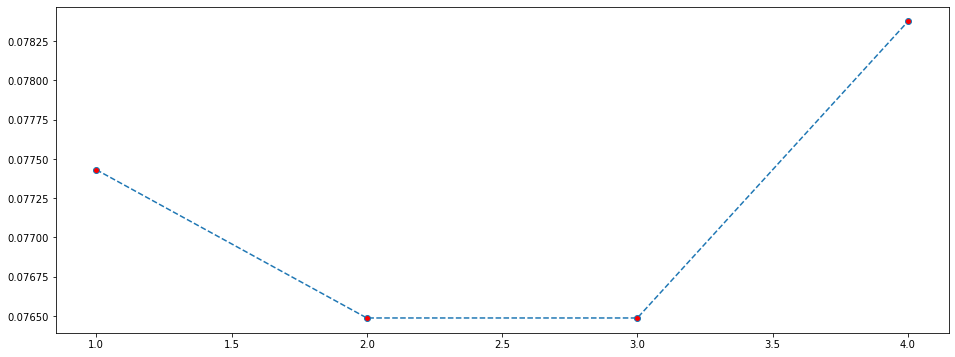

In [86]:
plt.figure(figsize=(16,6))
plt.plot(range(1,5), errorRate, marker = "o", mfc = "r", ls = "--")